### Training the model Kitty
Since the results are not replicated, the cell outputs of the model training is left, please take a look at them first before executing the code <br>
The model is saved though and can be loaded and tested, the functions for that are given below

In [1]:
from contextualized_topic_models.models.kitty_classifier import Kitty
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import random
import numpy as np
import csv

In [3]:
# Import the dataset CSV file
conan_dataset = []

with open('Task2_Dataset.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    conan_dataset_heading = next(reader)
    for row in reader:
        conan_dataset.append(row)
        
# Extract useful information that we need
index = [element[0] for element in conan_dataset]
tweets = [element[1] for element in conan_dataset]
targets = [element[2] for element in conan_dataset]

In [4]:
# Split the train and test set
x_train, x_test, y_train, y_test = train_test_split(tweets, targets, test_size=0.1)

In [16]:
# Train model
kt = Kitty()
kt.train(x_train, topics=18, epochs=27, stopwords_list=stopwords.words("english"), embedding_model="paraphrase-distilroberta-base-v2")

print(kt.pretty_print_word_classes())

/home/yasmeen/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Batches:   0%|          | 0/17 [00:00<?, ?it/s]

Epoch: [27/27]	 Seen Samples: [90342/90342]	Train Loss: 48.88230871370433	Time: 0:00:01.235733: : 27it [00:37,  1.40s/it] 
Sampling: [20/20]: : 20it [00:13,  1.53it/s]

0	migrants, welcome, criminals, crime, rapists
1	gay, sex, homosexuality, gays, blood
2	jobs, immigrants, steal, immigration, work
3	control, government, world, jews, better
4	refugees, learning, host, education, burden
5	islam, religion, ideology, violent, violence
6	gays, just, bunch, faggots, disgusting
7	islam, death, muslim, banned, cult
8	people, niggas, black, white, don
9	muslims, us, country, want, muslim
10	feminism, feminists, men, rights, equality
11	women, basically, childlike, remain, weak
12	black, blacks, inferior, white, different
13	place, incompatible, nothing, western, modern
14	muslims, problem, countries, uk, european
15	jewish, jews, bad, holocaust, greedy
16	don, want, work, children, woman
17	disabled, normal, children, syndrome, mentally


In [17]:
# 'DISABLED', 'JEWS', 'LGBT+', 'MIGRANTS', 'MUSLIMS', 'POC', 'WOMEN', 'other'
kt.assigned_classes = {0 : "MIGRANTS", 1 : "LGBT+", 2 : "MIGRANTS", 3 : "JEWS", 4: "MIGRANTS", 5: "MUSLIMS", 
                       6: "LGBT+", 7: "MUSLIMS", 8: "POC", 9: "MUSLIMS", 10: "WOMEN", 11: "WOMEN", 
                       12: "POC", 13: "MUSLIMS", 14: "MUSLIMS", 15: "JEWS", 16: "WOMEN", 17: "DISABLED"}
#                        16: "MIGRANTS", 17: "MUSLIMS", 18: "other", 19: "MIGRANTS", 20: "JEWS", 21: "MUSLIMS"}
#                        22: "WOMEN", 23: "DISABLED", 24: "DISABLED"}
train_predictions = kt.predict(x_train)
test_predictions = kt.predict(x_test)

Batches:   0%|          | 0/17 [00:00<?, ?it/s]

Sampling: [20/20]: : 20it [00:12,  1.56it/s]


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Sampling: [20/20]: : 20it [00:02,  8.18it/s]


Train Accuracy: 80.3347280334728
Test Accuracy: 83.33333333333334
Train F1-Score (weighted): 78.28470179322728
Test F1-Score (weighted): 82.44776968301734
Train F1-Score (macro): 70.6046253466082
Test F1-Score (macro): 71.03988571634154
Train F1-Score (micro): 80.3347280334728
Test F1-Score: (micro) 83.33333333333334
Train:
               precision    recall  f1-score   support

    DISABLED       0.78      0.77      0.78       170
        JEWS       0.87      0.77      0.81       419
       LGBT+       0.71      0.88      0.79       332
    MIGRANTS       0.81      0.81      0.81       573
     MUSLIMS       0.89      0.85      0.87       929
         POC       0.84      0.61      0.71       366
       WOMEN       0.94      0.83      0.88       557
       other       0.00      0.00      0.00         0

    accuracy                           0.80      3346
   macro avg       0.73      0.69      0.71      3346
weighted avg       0.85      0.80      0.82      3346



/home/yasmeen/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yasmeen/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yasmeen/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

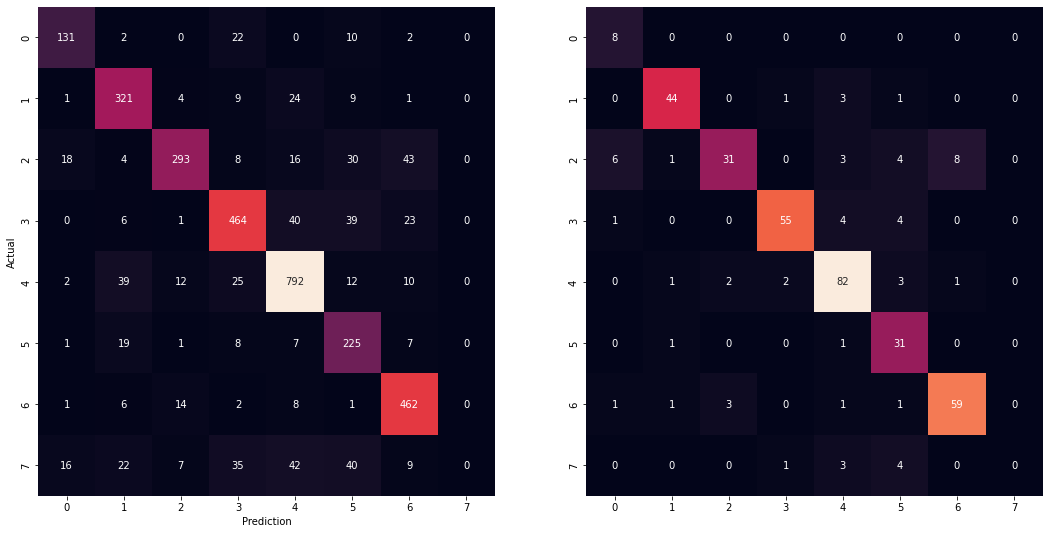

In [18]:
# Calculate the accuracy
print("Train Accuracy:", accuracy_score(train_predictions, y_train)*100)
print("Test Accuracy:", accuracy_score(test_predictions, y_test)*100)

# Calculate F1-Score
print("Train F1-Score (weighted):", f1_score(y_train, train_predictions, average='weighted')*100)
print("Test F1-Score (weighted):", f1_score(y_test, test_predictions, average='weighted')*100)

print("Train F1-Score (macro):", f1_score(y_train, train_predictions, average='macro')*100)
print("Test F1-Score (macro):", f1_score(y_test, test_predictions, average='macro')*100)

print("Train F1-Score (micro):", f1_score(y_train, train_predictions, average='micro')*100)
print("Test F1-Score: (micro)", f1_score(y_test, test_predictions, average='micro')*100)


print("Train:\n", classification_report(train_predictions, y_train))
# print("Test:\n", classification_report(test_predictions, y_test))

# Draw the confusion matrices
# Index:      0          1       2         3           4        5       6        7 
labels = ['DISABLED', 'JEWS', 'LGBT+', 'MIGRANTS', 'MUSLIMS', 'POC', 'WOMEN', 'other']
train_cm = confusion_matrix(y_train, train_predictions, labels=labels)
test_cm = confusion_matrix(y_test, test_predictions, labels=labels)

plt.figure(figsize=(18,9))
# Train
ax_train = plt.subplot(1,2,1)
sns.heatmap(train_cm, annot=True, fmt='g', cbar=False, ax=ax_train)

# labels, title and ticks
ax_train.set_xlabel('Prediction')
ax_train.set_ylabel('Actual')

# Test
ax_test = plt.subplot(1,2,2)
sns.heatmap(test_cm, annot=True, fmt='g', cbar=False, ax=ax_test)

### Saving the model
In case you want to save the model, please execute the cell below, if not then just skip this part

In [19]:
# Save model
kt.save("TestSave.pkl")

### Loading the model produced by the experiment
The model described in this experiment is loaded and tested. <br>
It is a topic model with epochs=27,topics=18 and the accuracy=80

In [ ]:
# Load model
kt_saved = Kitty.load("TM_e27t18a80.pkl")
# Predict
train_predictions_saved = kt_saved.predict(x_train)
test_predictions_saved = kt_saved.predict(x_test)

In [ ]:
# Calculate the accuracy
print("Train Accuracy:", accuracy_score(train_predictions_saved, y_train)*100)
print("Test Accuracy:", accuracy_score(test_predictions_saved, y_test)*100)

# Calculate F1-Score
print("Train F1-Score (weighted):", f1_score(y_train, train_predictions_saved, average='weighted')*100)
print("Test F1-Score (weighted):", f1_score(y_test, test_predictions_saved, average='weighted')*100)

print("Train F1-Score (macro):", f1_score(y_train, train_predictions_saved, average='macro')*100)
print("Test F1-Score (macro):", f1_score(y_test, test_predictions_saved, average='macro')*100)

print("Train F1-Score (micro):", f1_score(y_train, train_predictions_saved, average='micro')*100)
print("Test F1-Score: (micro)", f1_score(y_test, test_predictions_saved, average='micro')*100)

# Draw the confusion matrices
# Index:      0          1       2         3           4        5       6        7 
labels = ['DISABLED', 'JEWS', 'LGBT+', 'MIGRANTS', 'MUSLIMS', 'POC', 'WOMEN', 'other']
train_cm = confusion_matrix(y_train, train_predictions_saved, labels=labels)
test_cm = confusion_matrix(y_test, test_predictions_saved, labels=labels)

plt.figure(figsize=(18,9))
# Train
ax_train = plt.subplot(1,2,1)
sns.heatmap(train_cm, annot=True, fmt='g', cbar=False, ax=ax_train)

# labels, title and ticks
ax_train.set_xlabel('Prediction')
ax_train.set_ylabel('Actual')

# Test
ax_test = plt.subplot(1,2,2)
sns.heatmap(test_cm, annot=True, fmt='g', cbar=False, ax=ax_test)